# 基于这个数据集，可进行以下问题的探索：

1.基本情况：城市酒店和假日酒店预订需求和入住率比较；

2.用户行为：提前预订时间、入住时长、预订间隔、餐食预订情况；

3.一年中最佳预订酒店时间；

4.利用Logistic预测酒店预订。

也可以自行发现其他问题，并进行相应的挖掘。

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import cmath
import seaborn as sns
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

data=pd.read_csv('hotel_bookings.csv')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

# 1.基本情况：城市酒店和假日酒店预订需求和入住率比较；

In [59]:

#入住率=(total- cancel)/total
data_city=data[data['hotel']=='City Hotel']
data_resort=data[data['hotel']=='Resort Hotel']
print('City Hotel 入住率：{}'.format(data_city['is_canceled'].value_counts()[0]/(data_city['is_canceled'].value_counts()[0]+data_city['is_canceled'].value_counts()[1])))
print('Resort Hotel 入住率：{}'.format(data_resort['is_canceled'].value_counts()[0]/(data_resort['is_canceled'].value_counts()[0]+data_resort['is_canceled'].value_counts()[1])))





City Hotel 入住率：0.5827303668221354
Resort Hotel 入住率：0.7223664503245132


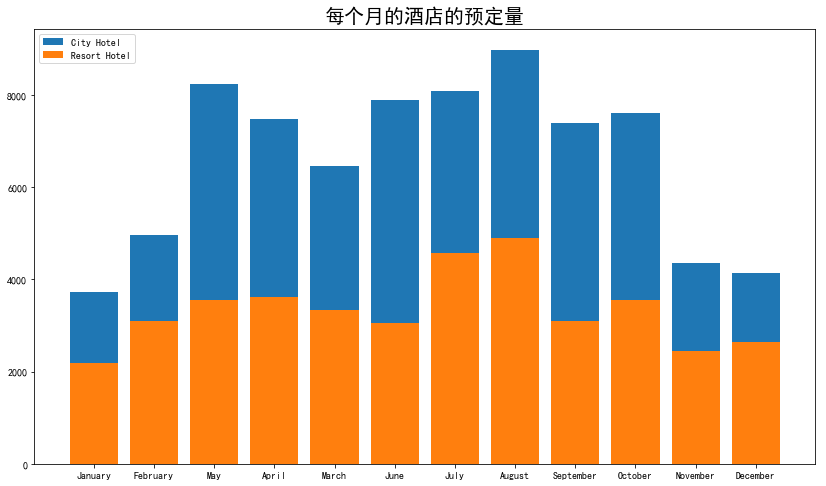

In [69]:
#预定需求 每月的预定量 对比

m_list=['January','February','May','April','March','June','July','August','September','October','November','December']

m_num=[0]*12
m_num_resort=[0]*12
data_city['arrival_date_month'].value_counts()
for i,j in enumerate(m_list):
    m_num[i]=data_city['arrival_date_month'].value_counts()[str(j)]
    m_num_resort[i]=data_resort['arrival_date_month'].value_counts()[str(j)]

    
plt.title('每个月的酒店的预定量',fontsize=20)

plt.rcParams['figure.figsize']=(14,8)
plt.bar(m_list,m_num,label='City Hotel')
plt.bar(m_list,m_num_resort,label='Resort Hotel')
plt.legend(loc="upper left") 

每个月的酒店订单取消率


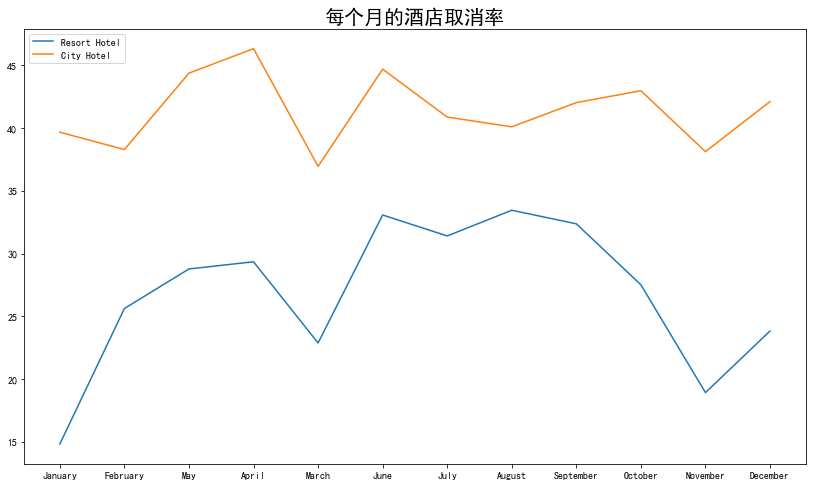

In [71]:
valid_data=data.loc[data['is_canceled']==0]

print('每个月的酒店订单取消率')

re_cancelations_month = data.loc[data["hotel"] == "Resort Hotel"].groupby("arrival_date_month")["is_canceled"].sum().reindex(index = m_list)
re_total_books = data.loc[data["hotel"] == "Resort Hotel"].groupby("arrival_date_month")["is_canceled"].count().reindex(index = m_list)
rate_resort=re_cancelations_month/re_total_books*100

ci_cancelations_month = data.loc[data["hotel"] == "City Hotel"].groupby("arrival_date_month")["is_canceled"].sum().reindex(index = m_list)
ci_total_books = data.loc[data["hotel"] == "City Hotel"].groupby("arrival_date_month")["is_canceled"].count().reindex(index = m_list)
rate_city=ci_cancelations_month/ci_total_books*100


plt.title('每个月的酒店取消率',fontsize=20)

plt.plot(m_list,rate_resort,label='Resort Hotel')
plt.plot(m_list,rate_city,label='City Hotel')
plt.legend(loc="upper left") 
plt.show()

# 2.用户行为：提前预订时间、入住时长、预订间隔、餐食预订情况；# 

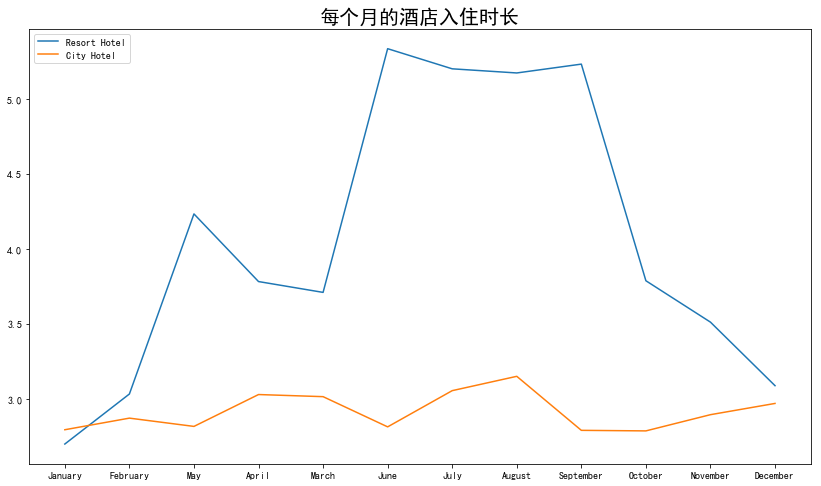

很明显，假日酒店在6-9月份的游客预定时间比较长，因为这个时间段是暑假的时期，游客更多的是预定假日酒店，预定时长普遍比较长，平均为5天；而城市酒店一年中游客的预定时间比较平价为3天左右，
从饼状图可以看到，超过50%用户入住天数在4天以内,一次性居住7天的人数也较多


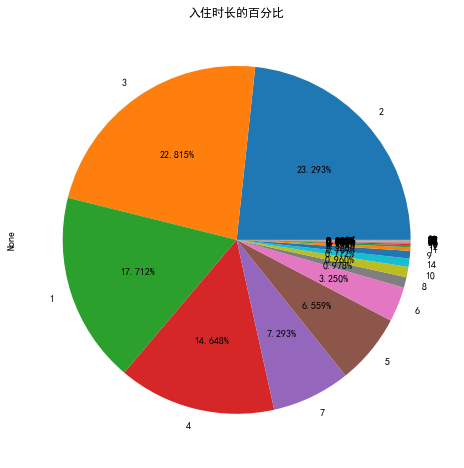

In [72]:
#入住时长情况
valid_data=data[data.is_canceled==0]

weekend_time=valid_data[valid_data['hotel']=='Resort Hotel'].groupby('arrival_date_month')['stays_in_weekend_nights'].mean().reindex(index = m_list)
week_time=valid_data[valid_data['hotel']=='Resort Hotel'].groupby('arrival_date_month')['stays_in_week_nights'].mean().reindex(index = m_list)
re_time=week_time+weekend_time

weekend_time=valid_data[valid_data['hotel']=='City Hotel'].groupby('arrival_date_month')['stays_in_weekend_nights'].mean().reindex(index = m_list)
week_time=valid_data[valid_data['hotel']=='City Hotel'].groupby('arrival_date_month')['stays_in_week_nights'].mean().reindex(index = m_list)
ci_time=week_time+weekend_time

plt.title('每个月的酒店入住时长',fontsize=20)
plt.plot(m_list,re_time,label='Resort Hotel')
plt.plot(m_list,ci_time,label='City Hotel')
plt.legend(loc="upper left") 
plt.show()
print('很明显，假日酒店在6-9月份的游客预定时间比较长，因为这个时间段是暑假的时期，游客更多的是预定假日酒店，预定时长普遍比较长，平均为5天；而城市酒店一年中游客的预定时间比较平价为3天左右，')

plt.title('入住时长的百分比')
time=data.stays_in_week_nights +data.stays_in_weekend_nights
time=time[time>0]
time_rate=time.value_counts()/time.shape[0]
time_rate.plot.pie(autopct='%.3f%%')

print('从饼状图可以看到，超过50%用户入住天数在4天以内,一次性居住7天的人数也较多')

In [63]:
#提前预定时间

lead=data.loc[data['is_canceled']==0].groupby('hotel')['lead_time'].mean()

print('每个酒店的提前预定时间平均值\n{}:{}\n{}:{}'.format("Resort Hotel",lead['Resort Hotel'],"City Hotel",lead['City Hotel']))

每个酒店的提前预定时间平均值
Resort Hotel:78.83761835648627
City Hotel:80.70273427360041


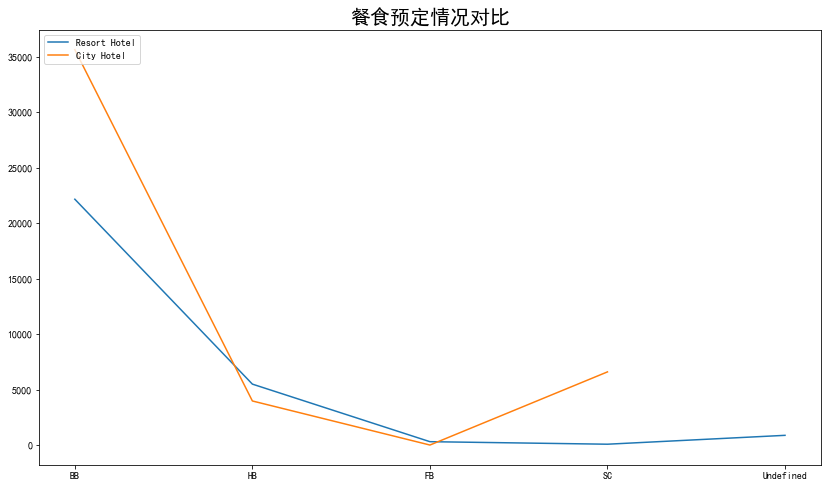

城市酒店大多数顾客没有订餐，而假日酒店多数预定了餐食，还有预定全餐的。


In [73]:
#餐食预订情况
meal_list=['BB','HB','FB','SC','Undefined']
re_food=valid_data[valid_data['hotel']=='Resort Hotel'].meal.value_counts().reindex(index=meal_list)
ci_food=valid_data[valid_data['hotel']=='City Hotel'].meal.value_counts().reindex(index=meal_list)
plt.title('餐食预定情况对比',fontsize=20)
plt.plot(meal_list,re_food,label='Resort Hotel')
plt.plot(meal_list,ci_food,label='City Hotel')
plt.legend(loc="upper left")
plt.show()
print('城市酒店大多数顾客没有订餐，而假日酒店多数预定了餐食，还有预定全餐的。')

# 3.一年中最佳预订酒店时间；

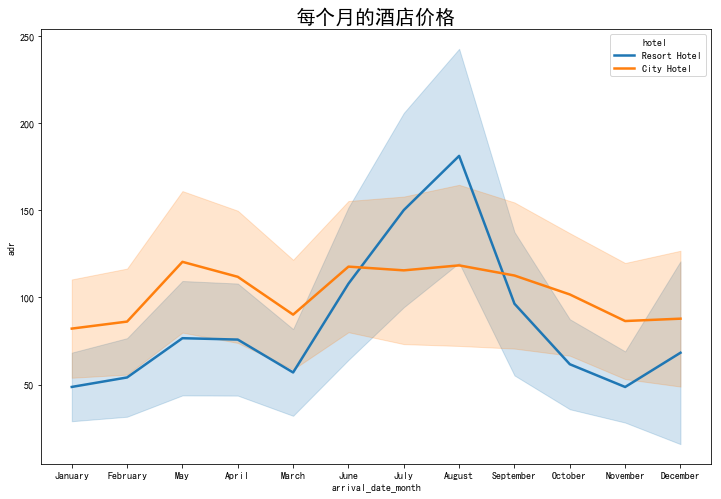

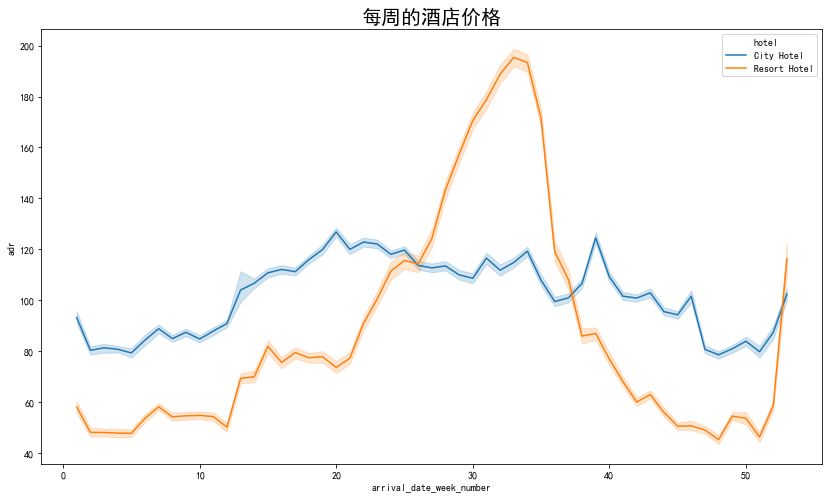

一年中最佳定酒店的时间：城市酒店的价格一年中比较稳定，分布在100美元左右，而假日酒店的价格在8月份左右比较高，高达180美元左右，这个跟暑假旅游旺季有关，但是假日酒店在平常的价格比城市酒店高。
所以，综合来定，在暑期预定城市酒店比较划算，不在暑期的话预定假日酒店划算，5月和11月比较便宜。


In [57]:
#一年中最佳预订酒店时间；




valid_data=data.loc[data['is_canceled']==0]
month_prices=valid_data[['hotel','arrival_date_month','adr']].sort_values('arrival_date_month')
month_prices['arrival_date_month']=pd.Categorical(month_prices['arrival_date_month'],categories=m_list,ordered=True)
plt.figure(figsize=(12,8))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=month_prices, 
            hue_order = ["Resort Hotel", "City Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title('每个月的酒店价格',fontsize=20)
plt.show()
sns.lineplot(x='arrival_date_week_number',y='adr',hue='hotel',data=data,hue_order=['City Hotel','Resort Hotel'])
plt.title('每周的酒店价格',fontsize=20)
plt.show()
print('一年中最佳定酒店的时间：城市酒店的价格一年中比较稳定，分布在100美元左右，而假日酒店的价格在8月份左右比较高，高达180美元左右，这个跟暑假旅游旺季有关，但是假日酒店在平常的价格比城市酒店高。')
print('所以，综合来定，在暑期预定城市酒店比较划算，不在暑期的话预定假日酒店划算，5月和11月比较便宜。')


# 4.利用Logistic预测酒店预订。

In [67]:
print('逻辑回归预测酒店订单是否取消的各个因素')
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

x=data.drop(['is_canceled'],axis=1)[num_features]
y=data['is_canceled']

#缺失值进行处理

nan_replace={'children':0.0,'agent':0} 
x.fillna(nan_replace,inplace=True)

X= x.values

y = y.values


# X= iris['data']

# y = iris['target']

# X = X[y!=2]

# y=y[y!=2]

X_train,X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LogisticRegression

print("sklern中的逻辑回归:")

logr = LogisticRegression()

logr.fit(X_train,y_train)

print("准确度:",logr.score(X_test,y_test))

逻辑回归预测酒店订单是否取消的各个因素
sklern中的逻辑回归:
准确度: 0.7221924417046368


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
